In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

### The game of Snakes and Ladders is a good candidate for analysis with a Markov Chain because of its memorylessness: at a given point in the game, the player's progression from the current square is independent of how they arrived at that square.

### In Markov Chain theory, the probability of a move from square i to square j is given by a transition matrix, T. 
 
### First consider a board with 100 squares and no snakes and no ladders. The player starts off the board, in a square we number 0, so the transiton matrix has dimensions 101×101, where we label the rows i=0,1,2,⋯100 as squares to move from and columns j=0,1,2,⋯100 as squares to move to. The first row the transition matrix therefore represents the probabilities of moving to each square from square 0; the second row represents the probabilities of moving to each square from square 1, and so on. The moves are decided by the roll of a fair, six-sided die so the first few rows of the transition matrix in this case look like:
 
### $$T = \begin{bmatrix} 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & ... & 0\\ 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & ... & 0\\ 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & ... & 0\\ ... \\ ... \\ ... \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 1/6 & 1/2 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 2/3 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 5/6 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 \\ \end{bmatrix}$$

### That is, (reading the first row) starting on square 0, there is a zero probability of remaining there, and a 1/6 probability of landing on each of the squares numbered 1–6. Reading the second row gives the probabilities for progression from square 1 (1/6 for each of the destination squares 2–7), and so on.

### Some people play Snakes and Ladders with the requirement that, to win, the player must land exactly on square 100, but those of us who don't feel the need to prolong the game any longer than absolutely necessary allow anyone with a roll that lands on or passes 100 to win. This will change the probabilities in the transition matrix for squares 94–99. For example, from square 97, a roll of 3,4,5 or 6 is sufficient to win. The bottom row of the transition matrix will be full of zeros because there is nowhere to go from square 100.

### The game can be analysed with a row vector, $\vec{\bf{v}}$ with 101 components, representing the probabilities that the player is on each of the squares. Initially, $\vec{\bf{v}}(0)$ is (1,0,0,⋯,0), i.e. the player is certainly on square 0 before the game has begun. Subsequently, $\vec{\bf{v}}$ evolves by the relation
 
### $$\vec{\bf{v}}^{(k+1)} = \vec{\bf{v}}^{(k)}\bf{T}$$

### That is, the probabilities for the next move, k+1, are given by the dot product of the current state vector, v(k) and the transition matrix, T.

Over-roll rule
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.33333333]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.5       ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.66666667]
 [0.         0.         0.         0.         0.         0.16666667
  0.83333333]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Exact rule
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.33333333 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.5        0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.         0.66666667 0.16666667
  0.16666667]
 [0. 

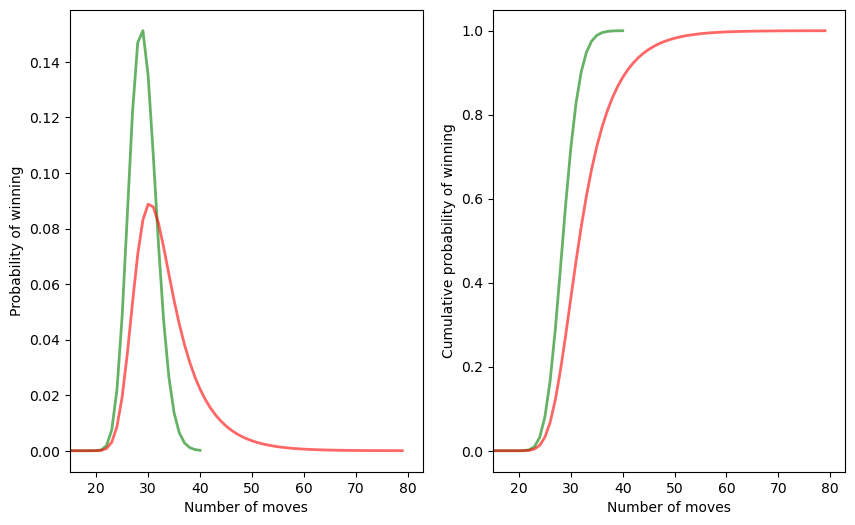

In [2]:
import numpy as np
import matplotlib.pyplot as plt

required_to_win = 0.9999  # The probability of winning required to stop the simulation

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you dont need to land on 100, just reach it.
T[95,100] = 2/6
T[96,100] = 3/6
T[97,100] = 4/6
T[98,100] = 5/6
T[99,100] = 1

# Set up the transition matrix
T1 = np.zeros((101, 101))
for i in range(1,101):
    T1[i-1,i:i+6] = 1/6

# House rules: you DO need to land on 100, not just reach it.
T1[95,95] = 1/6
T1[96,96] = 2/6
T1[97,97] = 3/6
T1[98,98] = 4/6
T1[99,99] = 5/6


print("Over-roll rule")
#print(T[0:6,0:12])
print(T[94:101,94:101])

print("Exact rule")
#print(T1[0:6,0:12])
print(T1[94:101,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < required_to_win:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n1, P1, C1 = 0, [], []
cumulative_prob1 = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob1 < required_to_win:
    n1 += 1
    v = v.dot(T1)
    P1.append(v[100])
    cumulative_prob1 += P1[-1]
    C1.append(cumulative_prob1)
    
mode1 = np.argmax(P1)+1
print('modal number of moves:', mode1)


# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].plot(np.linspace(1,n1,n1), P1, 'r', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'g', lw=2, alpha=0.6)
ax[1].plot(np.linspace(1,n1,n1), C1, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()

### The snakes and ladders are added as a list of tuples indicating which squares are joined. Note that the square on which a snake or ladder originates doesn't really need to be included in the transition matrix (since the player can never occupy these positions), but here we keep them for simplicity.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6
    
# House rules: you dont need to land on 100, just reach it.
T[95,100] = 2/6
T[96,100] = 3/6
T[97,100] = 4/6
T[98,100] = 5/6
T[99,100] = 1
    
for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

for snake in snakes:
    T[snake,100] = 0

# Set up the transition matrix
T1 = np.zeros((101, 101))
for i in range(1,101):
    T1[i-1,i:i+6] = 1/6
    
# House rules: you DO need to land on 100, not just reach it.
T1[95,95] = 1/6
T1[96,96] = 2/6
T1[97,97] = 3/6
T1[98,98] = 4/6
T1[99,99] = 5/6
    
for (i1,i2) in trans:
    iw = np.where(T1[:,i1] > 0)
    T1[:,i1] = 0
    T1[iw,i2] += 1/6

for snake in snakes:
    T1[snake,100] = 0

print("Over-roll rule")
#print(T[0:6,0:12])
print(T[94:101,94:101])

print("Exact rule")
#print(T1[0:6,0:12])
print(T1[94:101,94:101])

Over-roll rule
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.
  0.33333333]
 [0.         0.         0.         0.16666667 0.16666667 0.
  0.5       ]
 [0.         0.         0.         0.         0.16666667 0.
  0.66666667]
 [0.         0.         0.         0.         0.         0.
  0.83333333]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Exact rule
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.         0.33333333 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.         0.         0.5        0.16666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.66666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.       

In [4]:
# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n2, P2, C2 = 0, [], []
cumulative_prob2 = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob2 < required_to_win:
    n2 += 1
    v = v.dot(T)
    P2.append(v[100])
    cumulative_prob2 += P2[-1]
    C2.append(cumulative_prob2)
    
mode2 = np.argmax(P2)+1
print('modal number of moves:', mode2)   


modal number of moves: 19


In [5]:
# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n3, P3, C3 = 0, [], []
cumulative_prob3 = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob3 < required_to_win:
    n3 += 1
    v = v.dot(T1)
    #for j in range(1,101):
    #    if v[j] > 0:
    #        print(j, v[j])
    P3.append(v[100])
    cumulative_prob3 += P3[-1]
    C3.append(cumulative_prob3)
    #print(cumulative_prob3)
    
mode3 = np.argmax(P3)+1
print('modal number of moves:', mode3)    


modal number of moves: 23


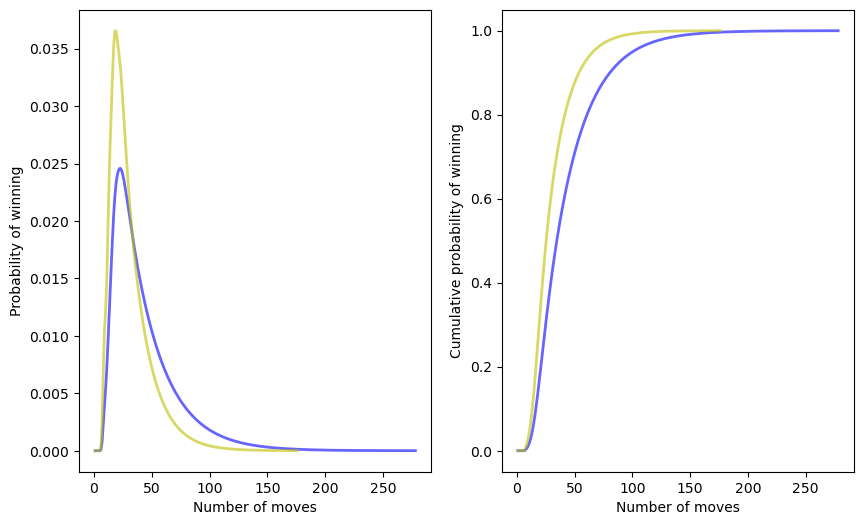

In [6]:


# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
#ax[0].plot(np.linspace(1,n1,n1), P1, 'g-', lw=2, alpha=0.6, label='Markov')
#ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].plot(np.linspace(1,n3,n3), P3, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
ax[0].plot(np.linspace(1,n2,n2), P2, 'y-', lw=2, alpha=0.6, label='No snakes or ladders with new rules')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
#ax[1].plot(np.linspace(1,n1,n1), C1, 'g-', lw=2, alpha=0.6, label='Markov')
#ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].plot(np.linspace(1,n3,n3), C3, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
ax[1].plot(np.linspace(1,n2,n2), C2, 'y-', lw=2, alpha=0.6, label='No snakes or ladders with new rules')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

Average number of moves: 33.2981
Median number of moves: 32.0
Standard deviation of number of moves: 6.018075804607316
Minimum number of moves: 21
Maximum number of moves: 82
Mode number of moves: 30


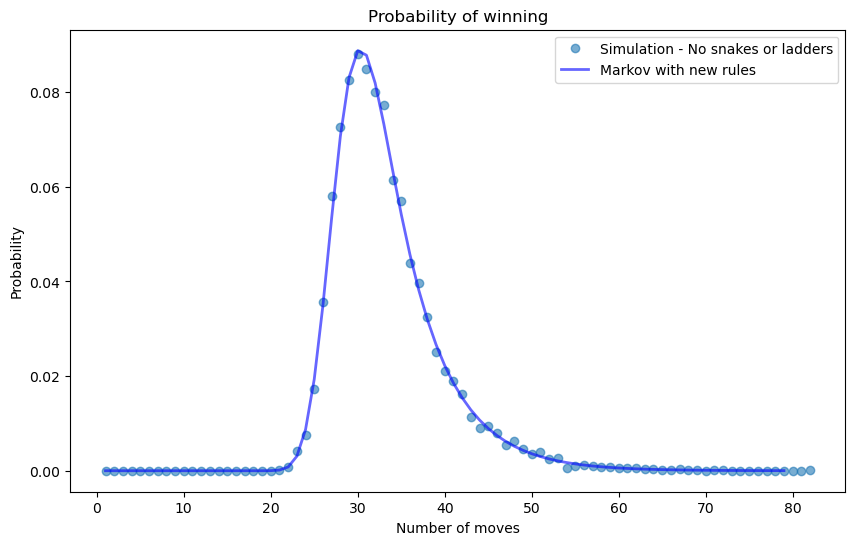

In [7]:
# Actual simulation of a single player game - no snakes or ladders

n_games = 10000

n_moves = []

for i in range(n_games):
    square = 0
    n = 0
    while square < 100:
        n += 1
        roll = np.random.randint(1,7)
        square += roll
        if square > 100:
            square -= roll
            
    n_moves.append(n)
    
print('Average number of moves:', np.mean(n_moves))
print('Median number of moves:', np.median(n_moves))
print('Standard deviation of number of moves:', np.std(n_moves))
print('Minimum number of moves:', np.min(n_moves))
print('Maximum number of moves:', np.max(n_moves))
print('Mode number of moves:', np.argmax(np.bincount(n_moves)))

prob_sim = np.bincount(n_moves)/n_games

plt.plot(np.linspace(1,np.max(n_moves),np.max(n_moves)), prob_sim[1:np.max(n_moves)+1], 'o', lw=2, alpha=0.6, label='Simulation - No snakes or ladders')
plt.plot(np.linspace(1,n1,n1), P1, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
plt.title('Probability of winning')
plt.xlabel('Number of moves')
plt.ylabel('Probability')
plt.legend()



Average number of moves: 43.0278
Median number of moves: 35.0
Standard deviation of number of moves: 28.121213116791388
Minimum number of moves: 6
Maximum number of moves: 316
Mode number of moves: 26


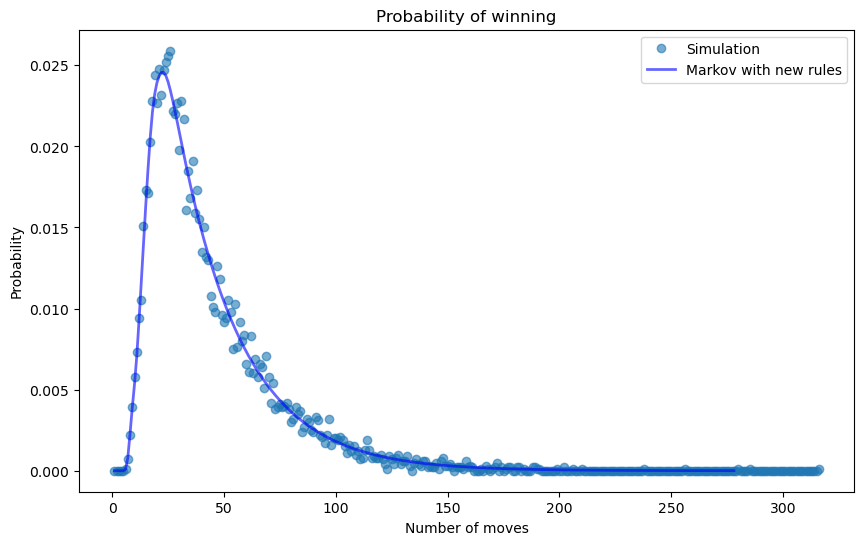

In [8]:
# Actual simulation of a single player game

n_games = 10000

n_moves = []

for i in range(n_games):
    square = 0
    n = 0
    while square < 100:
        n += 1
        roll = np.random.randint(1,7)
        square += roll
        
        if square in [ladder[0] for ladder in ladders]:
            square = [ladder[1] for ladder in ladders if ladder[0] == square][0]
        elif square in [snake[0] for snake in snakes]:
            square = [snake[1] for snake in snakes if snake[0] == square][0]
        
        if square > 100:
            square -= roll
            
    n_moves.append(n)
    
print('Average number of moves:', np.mean(n_moves))
print('Median number of moves:', np.median(n_moves))
print('Standard deviation of number of moves:', np.std(n_moves))
print('Minimum number of moves:', np.min(n_moves))
print('Maximum number of moves:', np.max(n_moves))
print('Mode number of moves:', np.argmax(np.bincount(n_moves)))

prob_sim = np.bincount(n_moves)/n_games

plt.plot(np.linspace(1,np.max(n_moves),np.max(n_moves)), prob_sim[1:np.max(n_moves)+1], 'o', lw=2, alpha=0.6, label='Simulation')
plt.plot(np.linspace(1,n3,n3), P3, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
plt.title('Probability of winning')
plt.xlabel('Number of moves')
plt.ylabel('Probability')
plt.legend()

Average number of moves: 30.1214
Median number of moves: 30.0
Standard deviation of number of moves: 3.564556359492721
Minimum number of moves: 19
Maximum number of moves: 56
Mode number of moves: 29


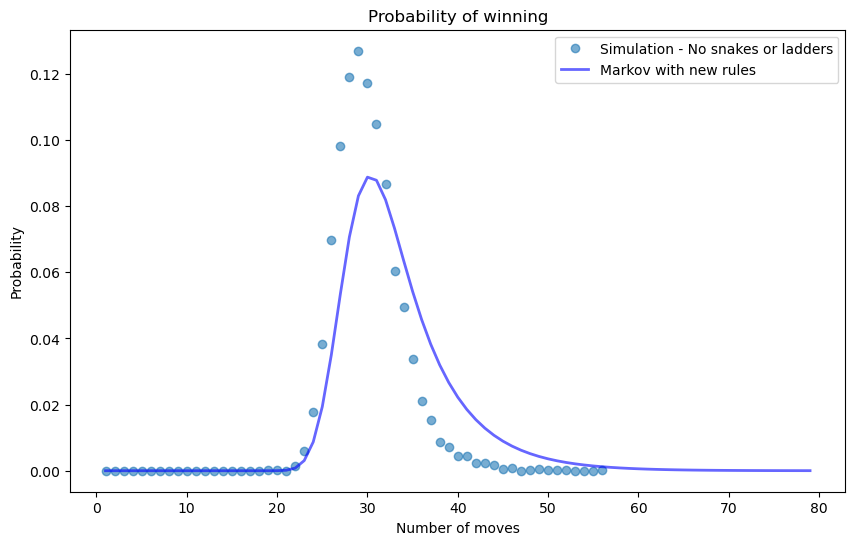

In [9]:
# Actual simulation of a two player game - no snakes or ladders

n_games = 10000

n_moves_winner = []

for i in range(n_games):
    square1 = 0
    square2 = 0
    np1 = 0
    np2 = 0
    while square1 < 100 and square2 < 100:
        np1 += 1
        roll = np.random.randint(1,7)
        square1 += roll
        if square1 > 100:
            square1 -= roll
        elif square1 == 100:
            n_moves_winner.append(np1)
            break
        np2 += 1
        roll = np.random.randint(1,7)
        square2 += roll
        if square2 > 100:
            square2 -= roll
        elif square2 == 100:
            n_moves_winner.append(np2)
            break
            
print('Average number of moves:', np.mean(n_moves_winner))
print('Median number of moves:', np.median(n_moves_winner))
print('Standard deviation of number of moves:', np.std(n_moves_winner))
print('Minimum number of moves:', np.min(n_moves_winner))
print('Maximum number of moves:', np.max(n_moves_winner))
print('Mode number of moves:', np.argmax(np.bincount(n_moves_winner)))

prob_sim = np.bincount(n_moves_winner)/n_games

plt.plot(np.linspace(1,np.max(n_moves_winner),np.max(n_moves_winner)), prob_sim[1:np.max(n_moves_winner)+1], 'o', lw=2, alpha=0.6, label='Simulation - No snakes or ladders')
plt.plot(np.linspace(1,n1,n1), P1, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
plt.title('Probability of winning')
plt.xlabel('Number of moves')
plt.ylabel('Probability')
plt.legend()

Average number of moves: 28.6835
Median number of moves: 25.0
Standard deviation of number of moves: 14.839108051025171
Minimum number of moves: 7
Maximum number of moves: 162
Mode number of moves: 18


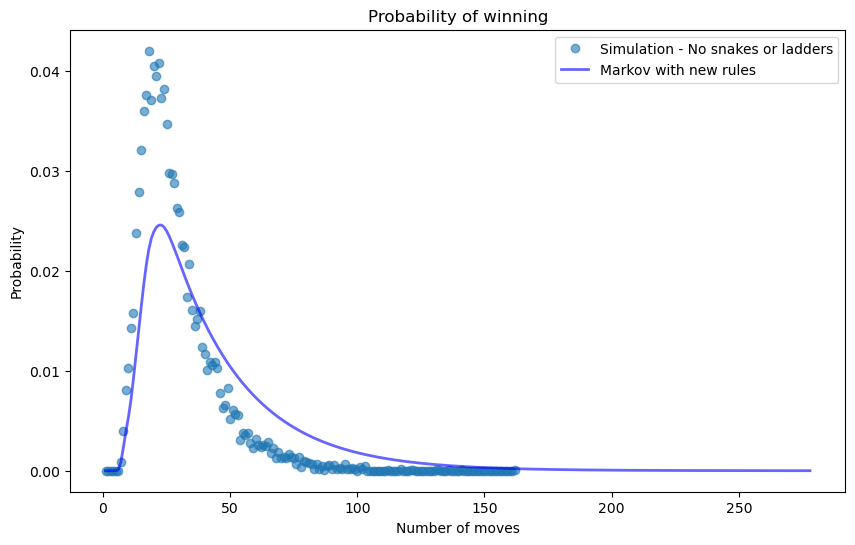

In [10]:
# Actual simulation of a two player game - with snakes or ladders

n_games = 10000

n_moves_winner = []

for i in range(n_games):
    square1 = 0
    square2 = 0
    np1 = 0
    np2 = 0
    while square1 < 100 and square2 < 100:
        np1 += 1
        roll = np.random.randint(1,7)
        square1 += roll
        
        if square1 in [ladder[0] for ladder in ladders]:
            square1 = [ladder[1] for ladder in ladders if ladder[0] == square1][0]
        elif square1 in [snake[0] for snake in snakes]:
            square1 = [snake[1] for snake in snakes if snake[0] == square1][0]
        
        if square1 > 100:
            square1 -= roll
        elif square1 == 100:
            n_moves_winner.append(np1)
            break
            
        np2 += 1
        roll = np.random.randint(1,7)
        square2 += roll
        
        if square2 in [ladder[0] for ladder in ladders]:
            square2 = [ladder[1] for ladder in ladders if ladder[0] == square2][0]
        elif square2 in [snake[0] for snake in snakes]:
            square2 = [snake[1] for snake in snakes if snake[0] == square2][0]
        
        if square2 > 100:
            square2 -= roll
        elif square2 == 100:
            n_moves_winner.append(np2)
            break
            
print('Average number of moves:', np.mean(n_moves_winner))
print('Median number of moves:', np.median(n_moves_winner))
print('Standard deviation of number of moves:', np.std(n_moves_winner))
print('Minimum number of moves:', np.min(n_moves_winner))
print('Maximum number of moves:', np.max(n_moves_winner))
print('Mode number of moves:', np.argmax(np.bincount(n_moves_winner)))

prob_sim = np.bincount(n_moves_winner)/n_games

plt.plot(np.linspace(1,np.max(n_moves_winner),np.max(n_moves_winner)), prob_sim[1:np.max(n_moves_winner)+1], 'o', lw=2, alpha=0.6, label='Simulation - No snakes or ladders')
plt.plot(np.linspace(1,n3,n3), P3, 'b-', lw=2, alpha=0.6, label='Markov with new rules')
plt.title('Probability of winning')
plt.xlabel('Number of moves')
plt.ylabel('Probability')
plt.legend()